In [1]:
import collections
import matplotlib.pyplot as plt
import getpass
import glob
import itertools
import json
import numpy as np
import os
import openml
import pandas as pd
import scipy.stats

from plot_utils.style import style_dc
from plot_utils.common_plots import rank, average_plot
from plot_utils.common_tables import collect_data_for_final_table, do_wilcoxon_test
from plot_utils.common_loading import load_from_openml

import sys
sys.path.append("/home/eggenspk/Work/Project/2020_PoSH_Autosklearn/2020_IEEE_Autosklearn_experiments/experiment_scripts/")
sys.path.append("/home/feurerm/sync_dir/projects/2020_posh/2020_IEEE_Autosklearn_experiments/experiment_scripts")
from utils import openml_automl_benchmark, automl_test_benchmark, get_normalization_constants

In [2]:
username = getpass.getuser()
dir_ = {
    'eggenspk': "/home/eggenspk/Work/data/ASKL_20",
    'feurerm': "/home/feurerm/projects/2021_posh_new/",
}[username]

valid_pretty = {
    #1: {
    #('portfolio', "1MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_holdout_iterative_es_if"): "holdout",
    #('portfolio', "1MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_holdout_iterative_es_if"): "SH; holdout",
    #('portfolio', "1MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_3CV_iterative_es_if"): "3CV",
    #('portfolio', "1MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_3CV_iterative_es_if"): "SH; 3CV",
    #('portfolio', "1MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_5CV_iterative_es_if"): "5CV",
    #('portfolio', "1MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_5CV_iterative_es_if"): "SH; 5CV",
    #('portfolio', "1MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_10CV_iterative_es_if"): "10CV",
    #('portfolio', "1MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_10CV_iterative_es_if"): "SH; 10CV",
    #('bo', "1MIN/ASKL_automldata_w_ensemble/RF/RF_None_holdout_iterative_es_if"): "holdout",
    #('bo', "1MIN/ASKL_automldata_w_ensemble/RF/RF_SH-eta4-i_holdout_iterative_es_if"): "SH; holdout",
    #('bo', "1MIN/ASKL_automldata_w_ensemble/RF/RF_None_3CV_iterative_es_if"): "3CV",
    #('bo', "1MIN/ASKL_automldata_w_ensemble/RF/RF_SH-eta4-i_3CV_iterative_es_if"): "SH; 3CV",
    #('bo', "1MIN/ASKL_automldata_w_ensemble/RF/RF_None_5CV_iterative_es_if"): "5CV",
    #('bo', "1MIN/ASKL_automldata_w_ensemble/RF/RF_SH-eta4-i_5CV_iterative_es_if"): "SH; 5CV",
    #('bo', "1MIN/ASKL_automldata_w_ensemble/RF/RF_None_10CV_iterative_es_if"): "10CV",
    #('bo', "1MIN/ASKL_automldata_w_ensemble/RF/RF_SH-eta4-i_10CV_iterative_es_if"): "SH; 10CV",
    #('knd', "1MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_None_holdout_iterative_es_if"): "holdout",
    #('knd', "1MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_SH-eta4-i_holdout_iterative_es_if"): "SH; holdout",
    #('knd', "1MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_None_3CV_iterative_es_if"): "3CV",
    #('knd', "1MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_SH-eta4-i_3CV_iterative_es_if"): "SH; 3CV",
    #('knd', "1MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_None_5CV_iterative_es_if"): "5CV",
    #('knd', "1MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_SH-eta4-i_5CV_iterative_es_if"): "SH; 5CV",
    #('knd', "1MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_None_10CV_iterative_es_if"): "10CV",
    #('knd', "1MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_SH-eta4-i_10CV_iterative_es_if"): "SH; 10CV",
    #},
    10: {
    ('portfolio', "10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_holdout_iterative_es_if"): "holdout",
    ('portfolio', "10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_holdout_iterative_es_if"): "SH; holdout",
    ('portfolio', "10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_3CV_iterative_es_if"): "3CV",
    ('portfolio', "10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_3CV_iterative_es_if"): "SH; 3CV",
    ('portfolio', "10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_5CV_iterative_es_if"): "5CV",
    ('portfolio', "10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_5CV_iterative_es_if"): "SH; 5CV",
    ('portfolio', "10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_10CV_iterative_es_if"): "10CV",
    ('portfolio', "10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_10CV_iterative_es_if"): "SH; 10CV",
    ('bo', "10MIN/ASKL_automldata_w_ensemble/RF/RF_None_holdout_iterative_es_if"): "holdout",
    ('bo', "10MIN/ASKL_automldata_w_ensemble/RF/RF_SH-eta4-i_holdout_iterative_es_if"): "SH; holdout",
    ('bo', "10MIN/ASKL_automldata_w_ensemble/RF/RF_None_3CV_iterative_es_if"): "3CV",
    ('bo', "10MIN/ASKL_automldata_w_ensemble/RF/RF_SH-eta4-i_3CV_iterative_es_if"): "SH; 3CV",
    ('bo', "10MIN/ASKL_automldata_w_ensemble/RF/RF_None_5CV_iterative_es_if"): "5CV",
    ('bo', "10MIN/ASKL_automldata_w_ensemble/RF/RF_SH-eta4-i_5CV_iterative_es_if"): "SH; 5CV",
    ('bo', "10MIN/ASKL_automldata_w_ensemble/RF/RF_None_10CV_iterative_es_if"): "10CV",
    ('bo', "10MIN/ASKL_automldata_w_ensemble/RF/RF_SH-eta4-i_10CV_iterative_es_if"): "SH; 10CV",
    ('knd', "10MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_None_holdout_iterative_es_if"): "holdout",
    ('knd', "10MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_SH-eta4-i_holdout_iterative_es_if"): "SH; holdout",
    ('knd', "10MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_None_3CV_iterative_es_if"): "3CV",
    ('knd', "10MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_SH-eta4-i_3CV_iterative_es_if"): "SH; 3CV",
    ('knd', "10MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_None_5CV_iterative_es_if"): "5CV",
    ('knd', "10MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_SH-eta4-i_5CV_iterative_es_if"): "SH; 5CV",
    ('knd', "10MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_None_10CV_iterative_es_if"): "10CV",
    ('knd', "10MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_SH-eta4-i_10CV_iterative_es_if"): "SH; 10CV",
    },
    60: {
    ('portfolio', "60MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_holdout_iterative_es_if"): "holdout",
    ('portfolio', "60MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_holdout_iterative_es_if"): "SH; holdout",
    ('portfolio', "60MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_3CV_iterative_es_if"): "3CV",
    ('portfolio', "60MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_3CV_iterative_es_if"): "SH; 3CV",
    ('portfolio', "60MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_5CV_iterative_es_if"): "5CV",
    ('portfolio', "60MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_5CV_iterative_es_if"): "SH; 5CV",
    ('portfolio', "60MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_10CV_iterative_es_if"): "10CV",
    ('portfolio', "60MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_10CV_iterative_es_if"): "SH; 10CV",
    ('bo', "60MIN/ASKL_automldata_w_ensemble/RF/RF_None_holdout_iterative_es_if"): "holdout",
    ('bo', "60MIN/ASKL_automldata_w_ensemble/RF/RF_SH-eta4-i_holdout_iterative_es_if"): "SH; holdout",
    ('bo', "60MIN/ASKL_automldata_w_ensemble/RF/RF_None_3CV_iterative_es_if"): "3CV",
    ('bo', "60MIN/ASKL_automldata_w_ensemble/RF/RF_SH-eta4-i_3CV_iterative_es_if"): "SH; 3CV",
    ('bo', "60MIN/ASKL_automldata_w_ensemble/RF/RF_None_5CV_iterative_es_if"): "5CV",
    ('bo', "60MIN/ASKL_automldata_w_ensemble/RF/RF_SH-eta4-i_5CV_iterative_es_if"): "SH; 5CV",
    ('bo', "60MIN/ASKL_automldata_w_ensemble/RF/RF_None_10CV_iterative_es_if"): "10CV",
    ('bo', "60MIN/ASKL_automldata_w_ensemble/RF/RF_SH-eta4-i_10CV_iterative_es_if"): "SH; 10CV",
    ('knd', "60MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_None_holdout_iterative_es_if"): "holdout",
    ('knd', "60MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_SH-eta4-i_holdout_iterative_es_if"): "SH; holdout",
    ('knd', "60MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_None_3CV_iterative_es_if"): "3CV",
    ('knd', "60MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_SH-eta4-i_3CV_iterative_es_if"): "SH; 3CV",
    ('knd', "60MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_None_5CV_iterative_es_if"): "5CV",
    ('knd', "60MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_SH-eta4-i_5CV_iterative_es_if"): "SH; 5CV",
    ('knd', "60MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_None_10CV_iterative_es_if"): "10CV",
    ('knd', "60MIN/ASKL_automldata_w_ensemble_w_knd/RF/RF_SH-eta4-i_10CV_iterative_es_if"): "SH; 10CV",
    },
}

task_ids = openml_automl_benchmark
n_seeds = 10
#task_ids = automl_test_benchmark
#n_seeds = 3

res_dc = {}
res_dc_ensemble = {}
miss = 0
miss_ens = 0
fallback = 0
for horizon in list(valid_pretty.keys()):
    res_dc[horizon] = {}
    res_dc_ensemble[horizon] = {}
    for tid in task_ids:
        res_dc[horizon][tid] = {}
        res_dc_ensemble[horizon][tid] = {}
        for mode in list(valid_pretty[horizon].keys()):
            
            auto, model_name = mode
            
            res_dc[horizon][tid][mode] = []
            res_dc_ensemble[horizon][tid][mode] = []
            for seed in range(10):
                if auto == "auto":
                    fl_tmpl = dir_ + "/" + model_name + "_%d_%d/result.json" % (tid, seed)
                    fl_tmpl_ens = dir_ + "/" + model_name + "_%d_%d/ensemble_results_bac_%d_%d_0.000000thresh_50size_1.000000best.json" % (tid, seed, tid, seed)
                elif auto == 'knd':
                    fl_tmpl = dir_ + "/" + model_name + "_%d_%d_25_0/result.json" % (tid, seed)
                    fl_tmpl_ens = dir_ + "/" + model_name + "_%d_%d_25_0/ensemble_results_bac_%d_%d_0.000000thresh_50size_1.000000best.json" % (tid, seed, tid, seed)
                else:
                    fl_tmpl = dir_ + "/" + model_name + "_%d_%d_0_0/result.json" % (tid, seed)
                    fl_tmpl_ens = dir_ + "/" + model_name + "_%d_%d_*_0/ensemble_results_bac_%d_%d_0.000000thresh_50size_1.000000best.json" % (tid, seed, tid, seed)
                fl = glob.glob(fl_tmpl)               
                if len(fl) == 0:
                    miss += 1
                    print(fl_tmpl)
                    res_dc[horizon][tid][mode].append({0.: 1.})
                    continue
                fl = fl[0]
                with open(fl, "r") as fh:
                    line = json.load(fh)
                    loss = line["0"]["trajectory"]
                    loss = [(l[0], l[1]) for l in loss]
                    loss = dict(loss)
                    res_dc[horizon][tid][mode].append(loss)
                    
                # Load ensemble
                fl = glob.glob(fl_tmpl_ens)               
                if len(fl) == 0:
                    fl = glob.glob(fl_tmpl)
                    if len(fl) == 0:                    
                        miss_ens += 1
                        res_dc_ensemble[horizon][tid][mode].append({0: 1})
                        print('Missing', fl_tmpl_ens)
                        continue
                    else:
                        fallback += 1
                        print('Ensemble missing, falling back to regular', fl[0])
                        pass
                fl = fl[0]
                with open(fl, "r") as fh:
                    try:
                        line = json.load(fh)
                    except json.JSONDecodeError as e:
                        fh.seek(0)
                        # Some files have two closing brackets...
                        line = json.loads(fh.read()[:-1])
                    except:
                        print(fl)
                        raise
                    if "50" in line:
                        loss = line["50"]["trajectory"]
                    else:
                        loss = line["0"]["trajectory"]
                    loss = [(l[0], l[1]) for l in loss]
                    loss = dict(loss)
                    res_dc_ensemble[horizon][tid][mode].append(loss)

            
print("Missing %d entries" % miss)
print("Missing %d ensembles" % miss_ens)
print("Fallback %d entries" % fallback)

Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_0_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_1_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_2_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_3_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_4_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/proj

Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_10CV_iterative_es_if_189873_6_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_10CV_iterative_es_if_189873_7_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_10CV_iterative_es_if_189873_8_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//10MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_SH-eta4-i_10CV_iterative_es_if_189873_9_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//10MIN/ASKL_automldata_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_0_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm

Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//60MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_0_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//60MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_1_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//60MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_2_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//60MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_3_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//60MIN/ASKL_automldata_run_with_portfolio_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_4_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/proj

Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//60MIN/ASKL_automldata_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_0_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//60MIN/ASKL_automldata_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_1_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//60MIN/ASKL_automldata_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_2_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//60MIN/ASKL_automldata_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_3_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//60MIN/ASKL_automldata_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_4_0_0/result.json
Ensemble missing, falling back to regular /home/feurerm/projects/2021_posh_new//60MIN/ASKL_automldata_w_ensemble/RF/RF_None_3CV_iterative_es_if_189873_5_0_

Missing 0 entries
Missing 0 ensembles
Fallback 360 entries


In [3]:
# Load some stuff from disc and openml - takes some time
tasks, task_ids_sorted_by_num_features = load_from_openml(task_ids)
min_diff_dc, _, _, _, _ = get_normalization_constants(
    results_dir=os.path.join(dir_, "60MIN/ASKL_automldata_run_with_portfolio_w_ensemble"),
    task_ids=task_ids,
    load=False,
    n_seeds=n_seeds,
)
tasks

Loaded tasks from openml
Could not find a runhistory for task ID 189873 and model selection strategy RF_None_3CV_iterative_es_if
Could not find a runhistory for task ID 189873 and model selection strategy RF_None_5CV_iterative_es_if
Could not find a runhistory for task ID 189873 and model selection strategy RF_None_10CV_iterative_es_if
Could not find a runhistory for task ID 168797 and model selection strategy Could not find a runhistory for task IDRF_None_10CV_iterative_es_if 168796
 and model selection strategy RF_None_10CV_iterative_es_if
Could not find a runhistory for task ID 189873 and model selection strategy RF_SH-eta4-i_3CV_iterative_es_if
Could not find a runhistory for task ID 189873 and model selection strategy RF_SH-eta4-i_5CV_iterative_es_if
Could not find a runhistory for task ID 189873 and model selection strategy RF_SH-eta4-i_10CV_iterative_es_if
Could not find a runhistory for task ID 168797 and model selection strategy RF_SH-eta4-i_10CV_iterative_es_if
Could not find

,tid,ttid,did,name,task_type,status,estimation_procedure,evaluation_measures,source_data,target_feature,...,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures,cost_matrix
189871,189871,TaskType.SUPERVISED_CLASSIFICATION,41163,dilbert,Supervised Classification,active,33% Holdout set,NaN,41163,class,...,5.0,1913.0,5.0,2001.0,10000.0,0.0,0.0,2000.0,1.0,NaN
189872,189872,TaskType.SUPERVISED_CLASSIFICATION,41164,fabert,Supervised Classification,active,33% Holdout set,NaN,41164,class,...,7.0,502.0,7.0,801.0,8237.0,0.0,0.0,800.0,1.0,NaN
189873,189873,TaskType.SUPERVISED_CLASSIFICATION,41167,dionis,Supervised Classification,active,33% Holdout set,NaN,41167,class,...,355.0,878.0,355.0,61.0,416188.0,0.0,0.0,60.0,1.0,NaN
168794,168794,TaskType.SUPERVISED_CLASSIFICATION,41165,robert,Supervised Classification,active,33% Holdout set,predictive_accuracy,41165,class,...,10.0,958.0,10.0,7201.0,10000.0,0.0,0.0,7200.0,1.0,NaN
168792,168792,TaskType.SUPERVISED_CLASSIFICATION,41168,jannis,Supervised Classification,active,33% Holdout set,predictive_accuracy,41168,class,...,4.0,1687.0,4.0,55.0,83733.0,0.0,0.0,54.0,1.0,NaN
168793,168793,TaskType.SUPERVISED_CLASSIFICATION,41166,volkert,Supervised Classification,active,33% Holdout set,predictive_accuracy,41166,class,...,10.0,1361.0,10.0,181.0,58310.0,0.0,0.0,180.0,1.0,NaN
75105,75105,TaskType.SUPERVISED_CLASSIFICATION,1111,KDDCup09_appetency,Supervised Classification,active,33% Holdout set,predictive_accuracy,1111,APPETENCY,...,15415.0,890.0,2.0,231.0,50000.0,50000.0,8024152.0,192.0,39.0,NaN
189906,189906,TaskType.SUPERVISED_CLASSIFICATION,40984,segment,Supervised Classification,active,33% Holdout set,NaN,40984,class,...,7.0,330.0,7.0,20.0,2310.0,0.0,0.0,19.0,1.0,NaN
189909,189909,TaskType.SUPERVISED_CLASSIFICATION,41027,jungle_chess_2pcs_raw_endgame_complete,Supervised Classification,active,33% Holdout set,NaN,41027,class,...,3.0,4335.0,3.0,7.0,44819.0,0.0,0.0,6.0,1.0,NaN
189908,189908,TaskType.SUPERVISED_CLASSIFICATION,40996,Fashion-MNIST,Supervised Classification,active,33% Holdout set,NaN,40996,class,...,10.0,7000.0,10.0,785.0,70000.0,0.0,0.0,784.0,1.0,NaN


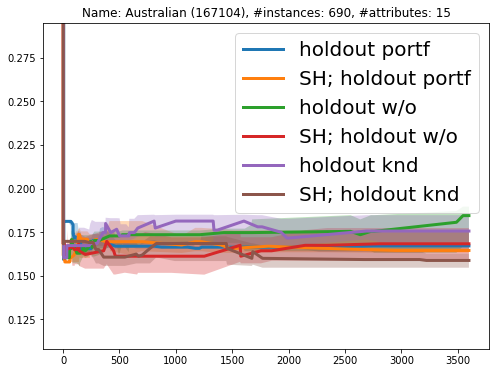

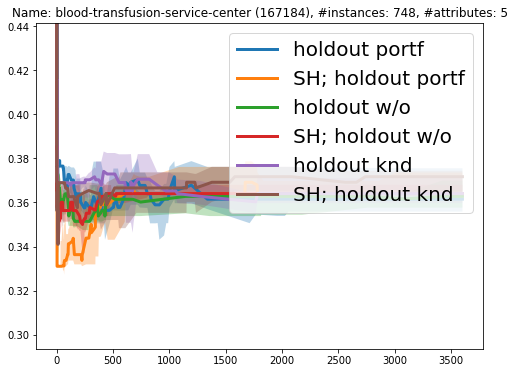

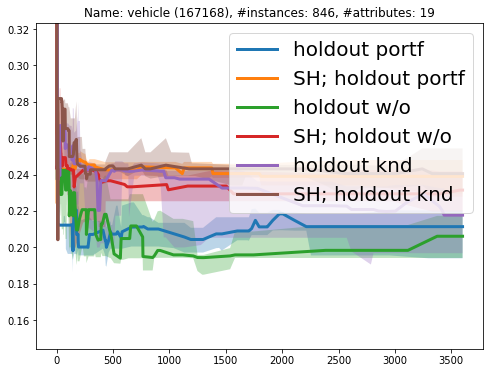

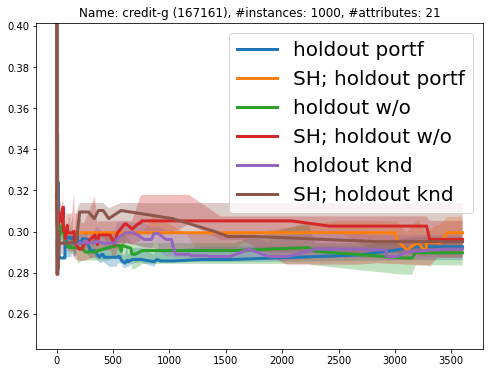

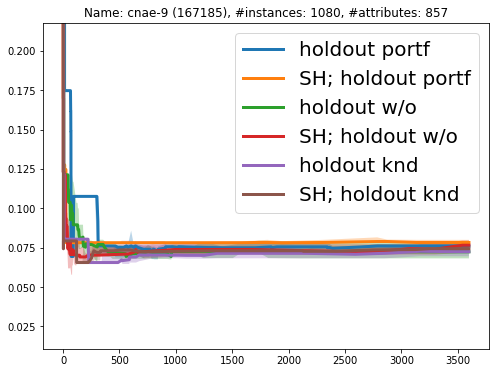

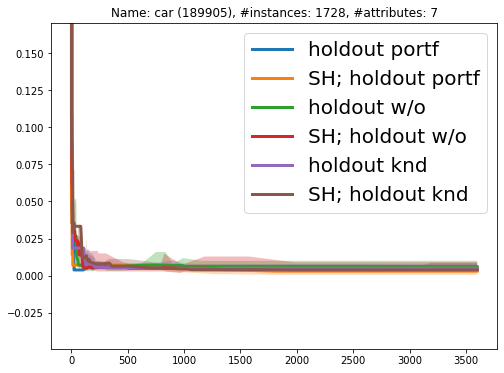

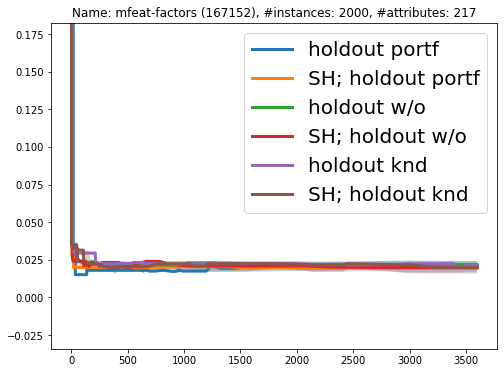

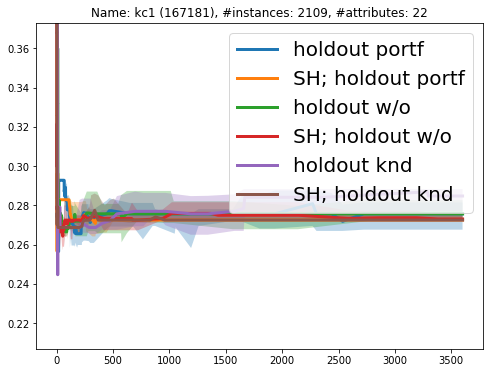

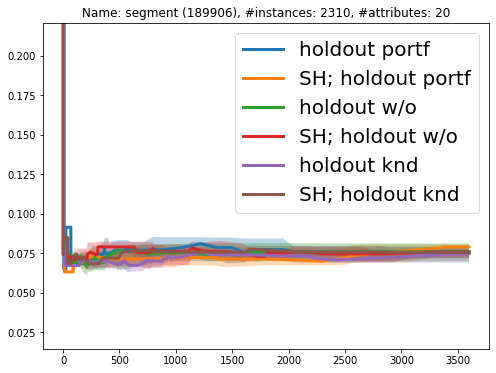

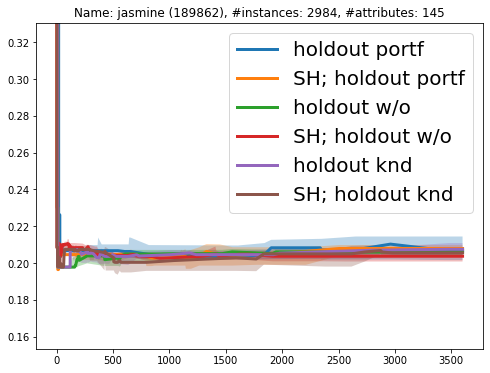

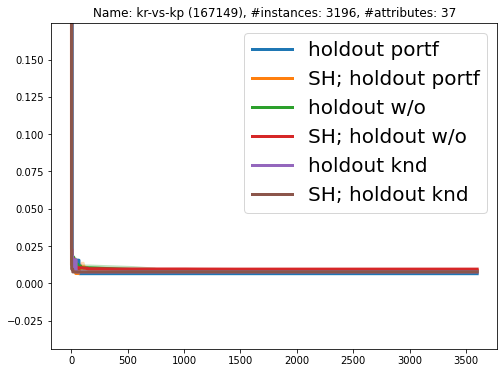

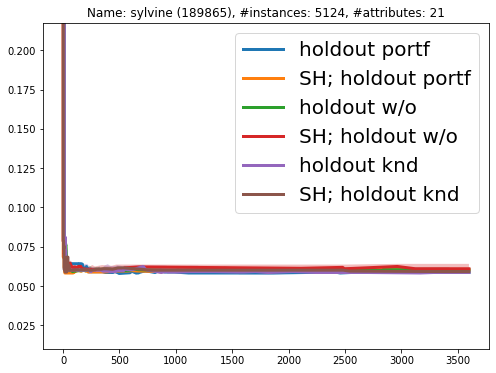

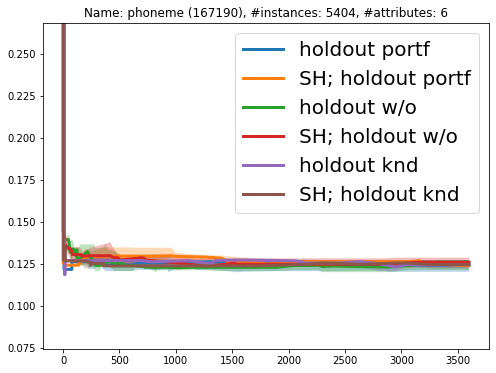

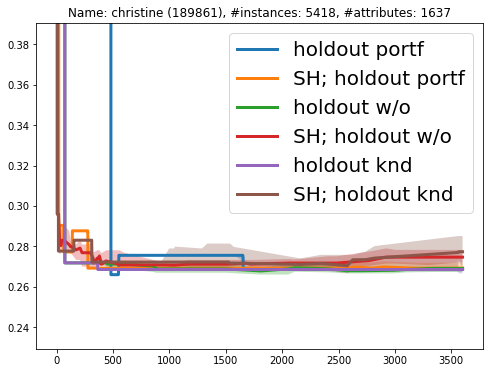

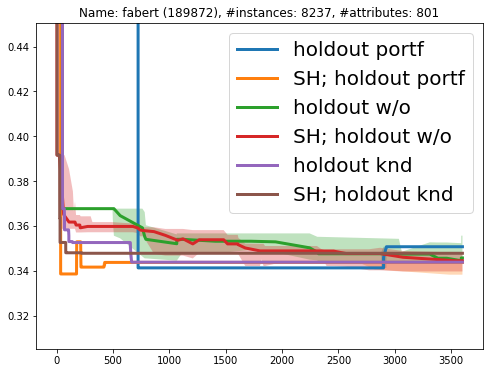

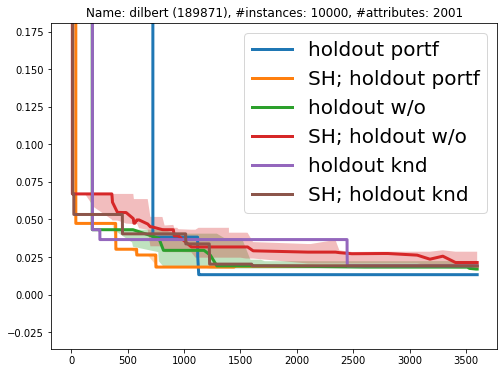

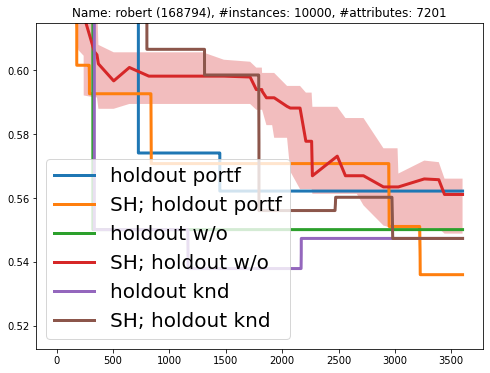

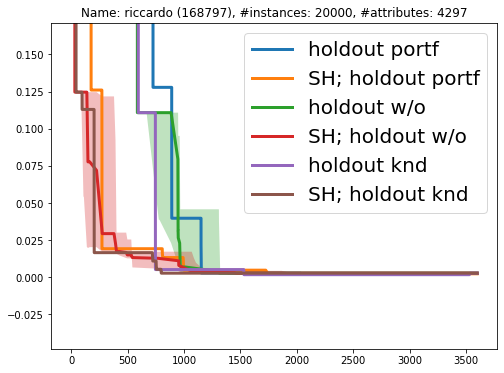

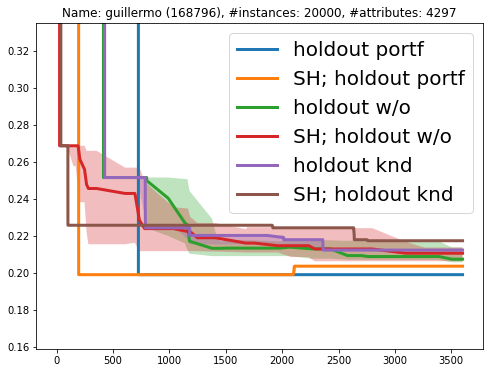

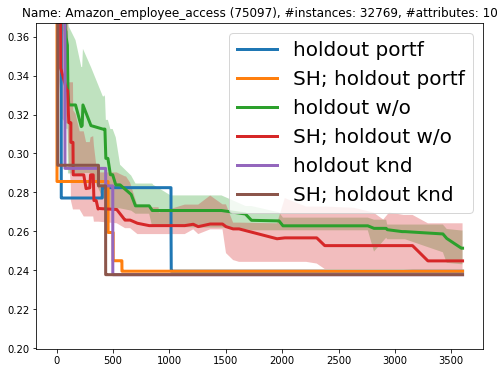

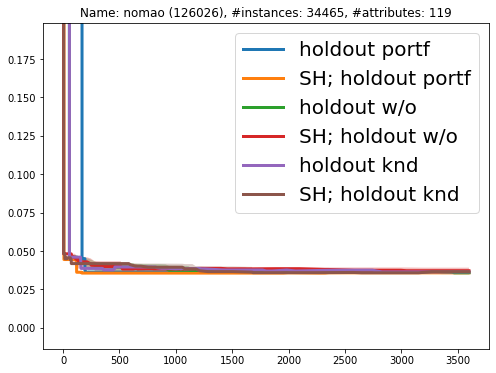

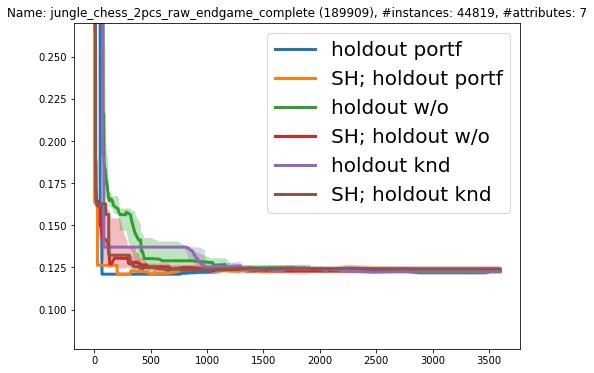

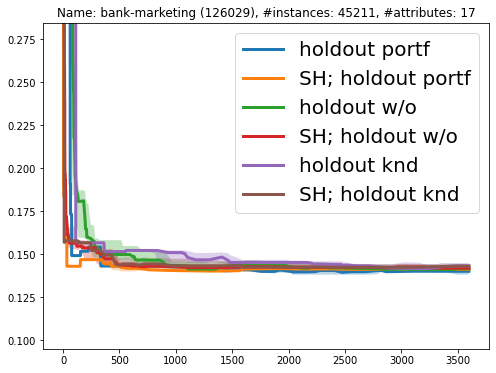

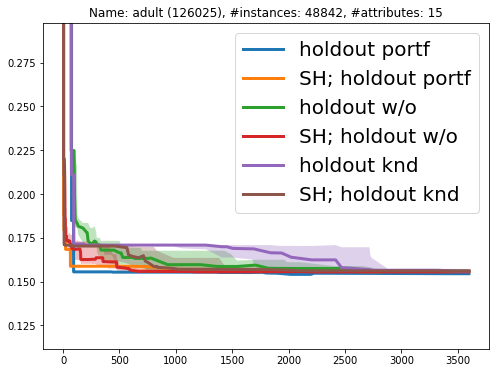

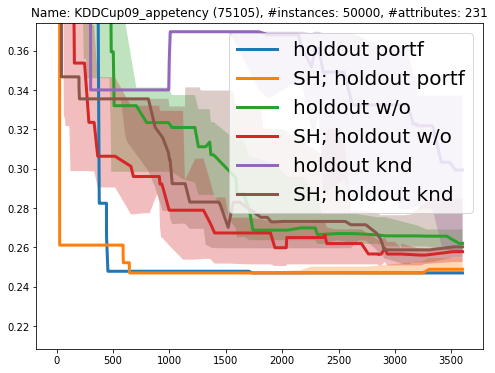

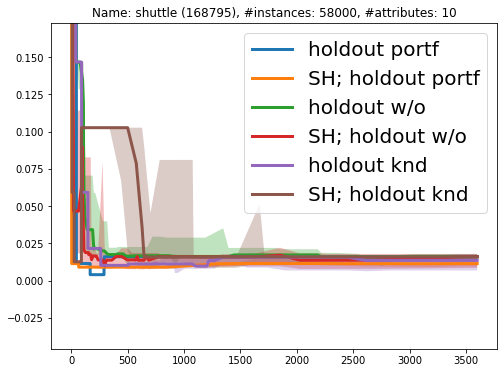

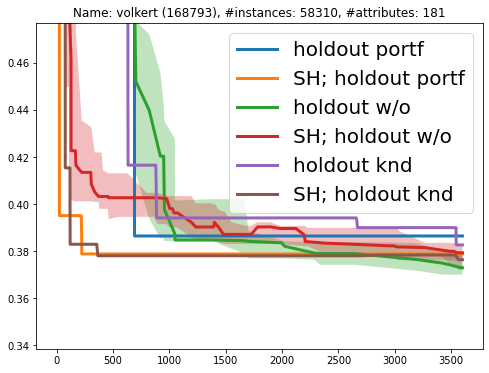

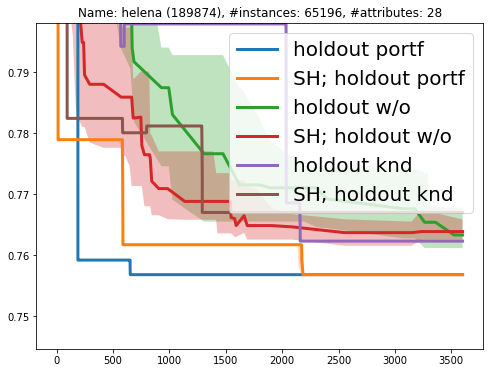

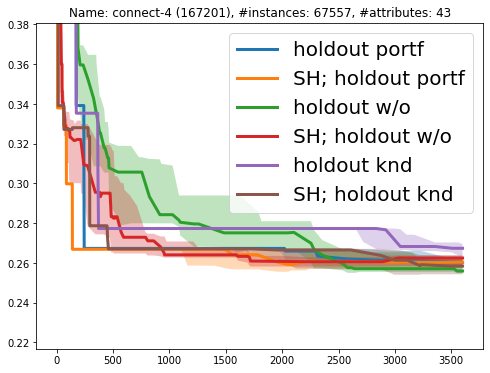

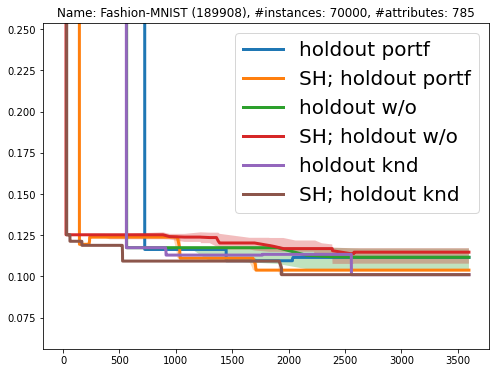

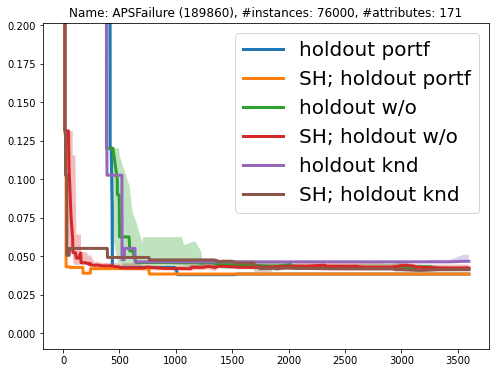

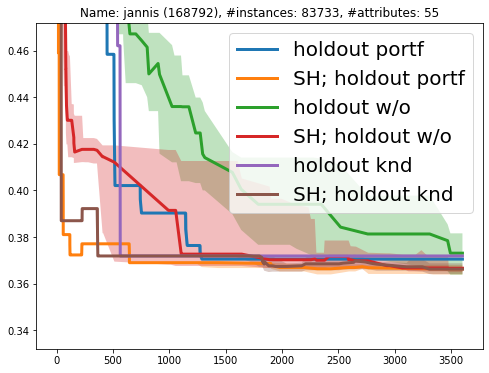

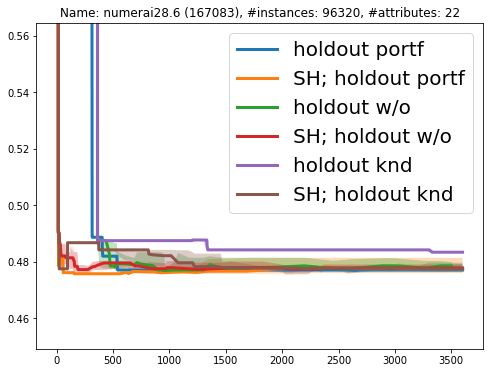

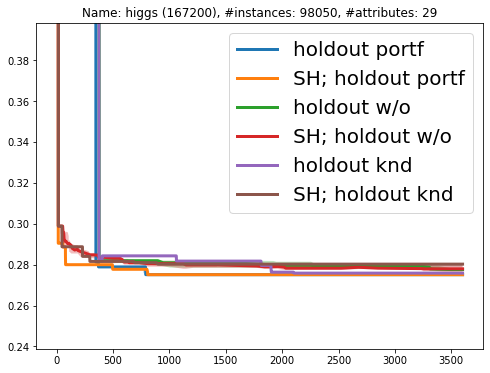

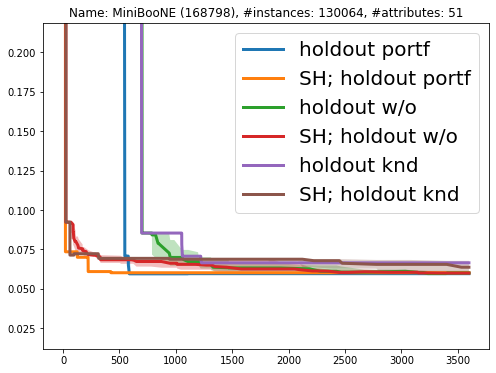

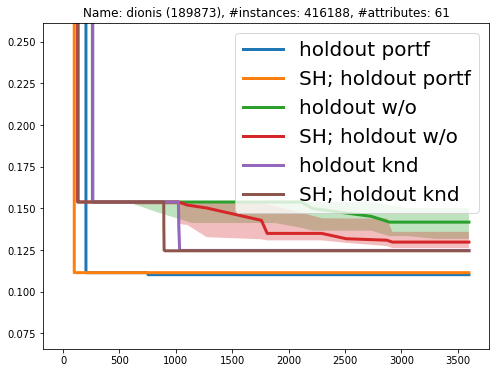

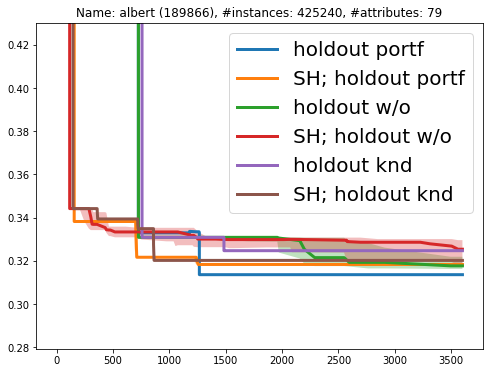

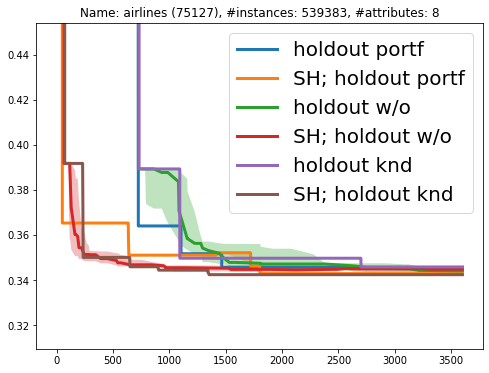

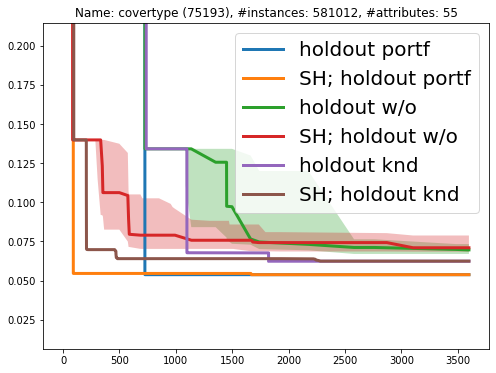

In [4]:
HORIZON = 60
for tid in task_ids_sorted_by_num_features:
    plt.figure(figsize=[8,6])
    colors = itertools.cycle(style_dc["colors"])
    for mode in list(valid_pretty[HORIZON].keys()):
        if "CV" in mode[1]:
            continue
        c = next(colors)
        tmp = pd.DataFrame(res_dc[HORIZON][tid][mode]).sort_index(axis=1).ffill(axis=1)
        med = tmp.median(axis=0)
        med.loc[HORIZON*60] = med.iloc[-1]
        low = tmp.quantile(0.25)
        low.loc[HORIZON*60] = low.iloc[-1]
        up = tmp.quantile(0.75, axis=0)
        up.loc[HORIZON*60] = up.iloc[-1]
        if mode[0] == 'knd':
            label = valid_pretty[HORIZON][mode] + " knd"
        elif mode[0] == 'bo':
            label = valid_pretty[HORIZON][mode] + " w/o"
        elif mode[0] == 'portfolio':
            label = valid_pretty[HORIZON][mode] + " portf"
        else:
            raise ValueError()
        plt.plot(med.index, med.to_numpy(), label=label, linewidth=3)
        
        plt.fill_between(med.index, low, up, alpha=0.3)
    plt.title('Name: %s (%d), #instances: %d, #attributes: %d' % (
        tasks.loc[tid, 'name'], tid, tasks.loc[tid, 'NumberOfInstances'], tasks.loc[tid, 'NumberOfFeatures']))
    plt.legend(fontsize=style_dc["fontsize"])
    plt.ylim([plt.ylim()[0], plt.ylim()[0] + 0.2*(plt.ylim()[1]-plt.ylim()[0])])
    #plt.xscale("log")
    plt.show()

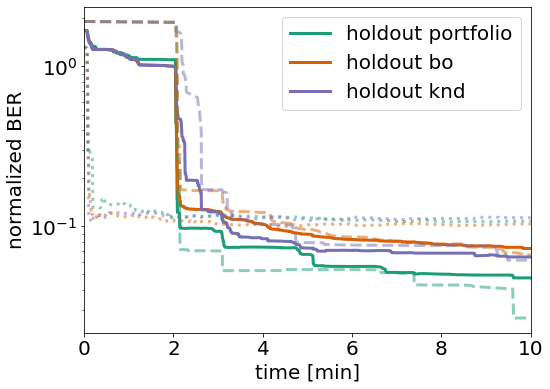

In [5]:
# Plot average BER across all datasets
HORIZON = 10
tmp_dc = {HORIZON: {}}
model_list = []
for m in valid_pretty[HORIZON].keys():
    if 'holdout' not in m[1] or 'SH' in m[1]:
        continue
    model_list.append(m)
    tmp_dc[HORIZON][m] = valid_pretty[HORIZON][m] + " " + str(m[0])

average_plot(model_list=model_list, res_dc=res_dc, valid_pretty=tmp_dc,
             horizon=HORIZON, task_ids_sorted_by_num_features=task_ids_sorted_by_num_features,
             min_diff_dc=min_diff_dc)
plt.yscale("log")
plt.show()

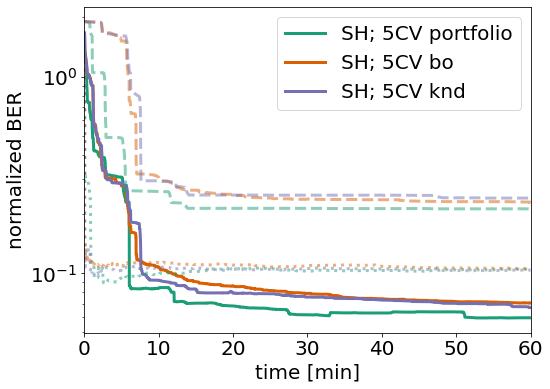

In [6]:
# Plot average BER across all datasets
HORIZON = 60
tmp_dc = {HORIZON: {}}
model_list = []
for m in valid_pretty[HORIZON].keys():
    if '5CV' not in m[1] or 'SH' not in m[1]:
        continue
    model_list.append(m)
    tmp_dc[HORIZON][m] = valid_pretty[HORIZON][m] + " " + str(m[0])

average_plot(model_list=model_list, res_dc=res_dc, valid_pretty=tmp_dc,
             horizon=HORIZON, task_ids_sorted_by_num_features=task_ids_sorted_by_num_features,
             min_diff_dc=min_diff_dc)
plt.yscale("log")
plt.show()

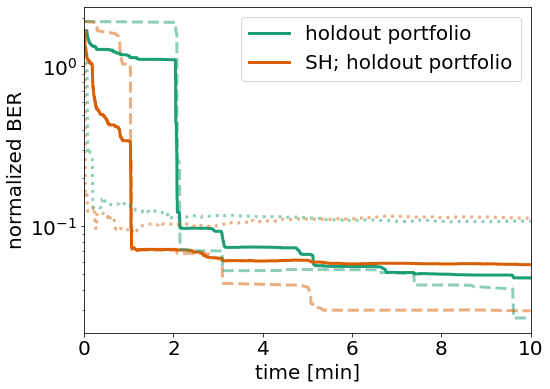

In [7]:
# Plot average BER across all datasets
HORIZON = 10
tmp_dc = {HORIZON: {}}
model_list = []
for m in valid_pretty[HORIZON].keys():
    if (not ('RF_None_holdout' in m[1] or 'RF_SH-eta4-i_holdout' in m[1])) or 'portfolio' not in m[1]:
        continue
    model_list.append(m)
    tmp_dc[HORIZON][m] = valid_pretty[HORIZON][m] + " " + str(m[0])

average_plot(model_list=model_list, res_dc=res_dc, valid_pretty=tmp_dc,
             horizon=HORIZON, task_ids_sorted_by_num_features=task_ids_sorted_by_num_features,
             min_diff_dc=min_diff_dc)
plt.yscale("log")
plt.show()

In [8]:
for tmp_res_dc in (res_dc, res_dc_ensemble):
    # Generate final tables
    tab_data = {}

    # Assume we have either all or no models
    horizon_list = sorted(list(valid_pretty.keys()))
    model_list = {}
    for h in horizon_list:
        model_list[h] = []
        for m in valid_pretty[h].keys():
            model_list[h].append((m,valid_pretty[h][m]))

    stat_test_data = {}
    for horizon in horizon_list:
        #tab_data[horizon] = {}
        tab_data[str(horizon) + " bo"] = {}
        tab_data[str(horizon) + " Portfolio"] = {}
        tab_data[str(horizon) + " KND"] = {}
        stat_test_data[horizon] = {}
        stat_test_data[str(horizon) + " bo"] = {}
        stat_test_data[str(horizon) + " Portfolio"] = {}
        stat_test_data[str(horizon) + " KND"] = {}
        #tab_data["STD %s" % horizon] = {}

        for mode in model_list[horizon]:
            mode = mode[0]
            assert mode in valid_pretty[horizon], (mode, valid_pretty[horizon].keys())
            # Use label, not actual key
            task_scores = []
            seed_means = []
            # Get means per tid
            for tid in task_ids_sorted_by_num_features:
                tmp = pd.DataFrame(tmp_res_dc[horizon][tid][mode]).sort_index(axis=1).ffill(axis=1)
                tmp = (tmp - min_diff_dc[tid][0]) / min_diff_dc[tid][1]
                try:
                    task_scores.append(tmp.mean().iloc[-1])
                except:
                    print(tid, mode, tmp)
                    raise
            # Get vars per seed
            for s in range(n_seeds):
                vals_for_this_seed = []
                for tid in task_ids_sorted_by_num_features:
                    try:
                        tmp_key = sorted(list(tmp_res_dc[horizon][tid][mode][s].keys()))[-1]
                    except IndexError:
                        continue
                    tmp = tmp_res_dc[horizon][tid][mode][s][tmp_key]
                    tmp = (tmp - min_diff_dc[tid][0]) / min_diff_dc[tid][1]
                    vals_for_this_seed.append(tmp)
                seed_means.append(np.mean(vals_for_this_seed))
            seed_means = np.array(seed_means)
            if mode[0] == 'knd':
                tab_data[str(horizon) + " KND"][valid_pretty[horizon][mode]] = np.round(np.mean(task_scores)*100, 2)
                stat_test_data[str(horizon) + " KND"][valid_pretty[horizon][mode]] = task_scores
            elif mode[0] == 'bo':
                tab_data[str(horizon) + " bo"][valid_pretty[horizon][mode]] = np.round(np.mean(task_scores)*100, 2)
                stat_test_data[str(horizon) + " bo"][valid_pretty[horizon][mode]] = task_scores
            elif mode[0] == 'portfolio':
                tab_data[str(horizon) + " Portfolio"][valid_pretty[horizon][mode]] = np.round(np.mean(task_scores)*100, 2)
                stat_test_data[str(horizon) + " Portfolio"][valid_pretty[horizon][mode]] = task_scores
            else:
                raise ValueError()
            #tab_data["STD %s" % horizon][valid_pretty[horizon][mode]] = np.round(np.std(seed_means*100), 2)

    #["10 bo", "10 KND", "10 Portfolio", "60 bo", "60 KND", "60 Portfolio"]
    tab_data = pd.DataFrame(tab_data)
    print(tab_data.columns)
    #print(pd.DataFrame(tab_data))
    #print(tab_data[['10 bo', '10 KND', '10 Portfolio', 
    #                '60 bo', '60 KND', '60 Portfolio']])
    
    class formatter:
        def __call__(self, value):
            return '$%2.2f$' % value

    formatters = [formatter() for _ in range(6)]
    
    
    print(pd.DataFrame(tab_data)[['10 bo', '10 KND', '10 Portfolio', 
                                  '60 bo', '60 KND', '60 Portfolio']].to_latex(formatters=formatters, escape=False))

    not_different = {}
    for h in horizon_list:
        not_different[h] = []
        best = 100
        best_m = None
        for m1 in model_list[h]:
            one, two, three = None, None, None
            p1, p2, p3 = None, None, None
            if m1[0][0] == 'portfolio':
                one = stat_test_data[str(h) + ' Portfolio'][valid_pretty[h][m1[0]]]
                p1 = np.mean(one)
                # find method w/o port
                for m2 in model_list[h]:
                    if m2[1] == m1[1] and m2[0][0] == 'bo':
                        two = stat_test_data[str(h) + " bo"][valid_pretty[h][m2[0]]]
                        p2 = np.mean(two)
                        break
                # find method k-nearest datasets
                for m3 in model_list[h]:
                    if m3[1] == m1[1] and m3[0][0] == 'knd':
                        three = stat_test_data[str(h) + " KND"][valid_pretty[h][m3[0]]]
                        p3 = np.mean(three)
                        break
                assert one is not None
                assert two is not None
                assert three is not None
                assert len(one) == len(task_ids)
                assert len(two) == len(task_ids)
                assert len(three) == len(task_ids)
                if p1 < p2 and p1 < p3:
                    opt = (one, m1)
                    chal = ((two, m2), (three, m3))
                elif p2 < p1 and p2 < p3:
                    opt = (two, m2)
                    chal = ((one, m1), (three, m3))
                elif p3 < p1 and p3 < p2:
                    opt = (three, m3)
                    chal = ((one, m1), (two, m2))
                else:
                    raise ValueError()
                    continue
                for c in chal:
                    s, p = scipy.stats.wilcoxon(x=opt[0], y=c[0], alternative="less")
                    if p > 0.05:
                        not_different[h].append((c[1][1], opt[1][0][0], c[1][0][0], 
                                                 p, np.mean(opt[0])*100, np.mean(c[0])*100))

    for h in horizon_list:
        print("Not different with %d mins:\n\t" % h, "\n\t".join(["%s: %s vs %s: %g (%g;%g)" % n for n in not_different[h]]))

Index(['10 bo', '10 Portfolio', '10 KND', '60 bo', '60 Portfolio', '60 KND'], dtype='object')
\begin{tabular}{lrrrrrr}
\toprule
{} &   10 bo &  10 KND & 10 Portfolio &   60 bo &  60 KND & 60 Portfolio \\
\midrule
holdout     &  $7.27$ &  $6.43$ &       $4.76$ &  $4.58$ &  $4.99$ &       $4.02$ \\
SH; holdout &  $6.61$ &  $6.70$ &       $5.76$ &  $4.70$ &  $4.63$ &       $3.97$ \\
3CV         &  $9.58$ &  $8.95$ &       $7.88$ &  $7.10$ &  $7.12$ &       $5.98$ \\
SH; 3CV     &  $8.88$ &  $8.97$ &       $7.20$ &  $6.81$ &  $6.47$ &       $6.01$ \\
5CV         & $10.48$ & $15.24$ &      $13.77$ &  $7.34$ &  $7.47$ &       $5.66$ \\
SH; 5CV     & $11.70$ & $13.29$ &       $8.06$ &  $7.05$ &  $6.69$ &       $5.93$ \\
10CV        & $23.20$ & $27.45$ &      $18.73$ & $17.59$ & $17.47$ &      $16.17$ \\
SH; 10CV    & $23.98$ & $27.70$ &      $18.84$ & $16.94$ & $16.98$ &      $16.07$ \\
\bottomrule
\end{tabular}

Not different with 10 mins:
	 SH; holdout: portfolio vs knd: 0.0995955 (5.7581;6

Plotting 3 models
0 / 200
50 / 200
100 / 200
150 / 200
Plotting 3 models
0 / 200
50 / 200
100 / 200
150 / 200
Plotting 3 models
0 / 200
50 / 200
100 / 200
150 / 200
Plotting 3 models
0 / 200
50 / 200
100 / 200
150 / 200


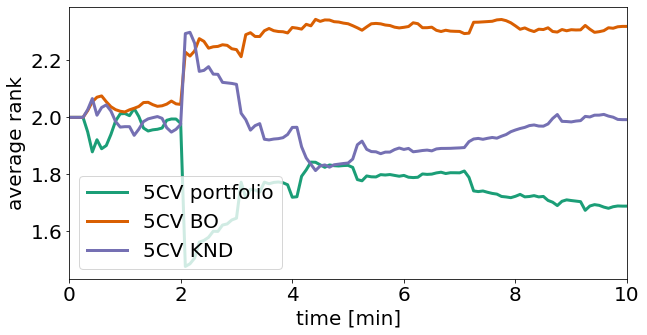

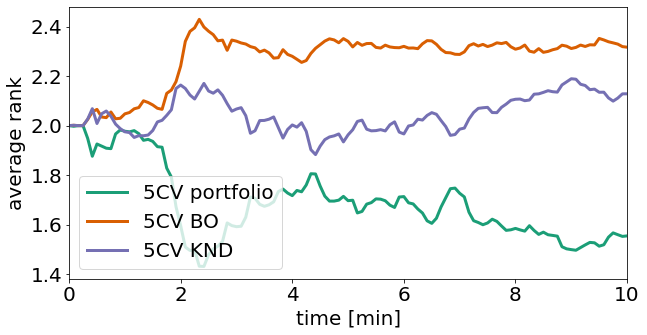

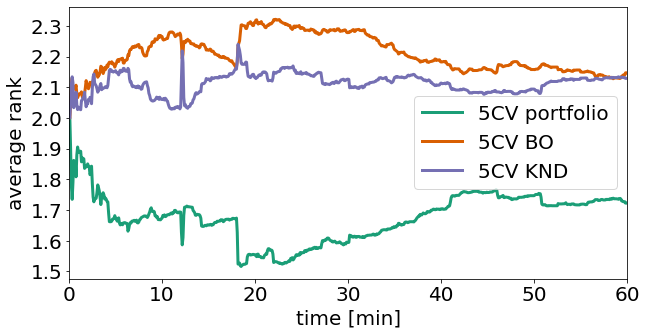

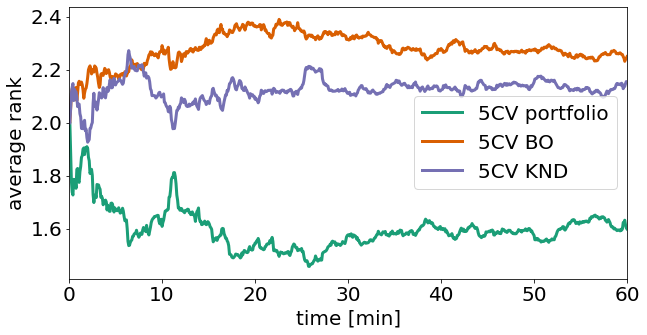

In [9]:
# Do ranking plot
for HORIZON in (10, 60):
    for tmp_res_dc in (res_dc, res_dc_ensemble):
        tmp_dc = {HORIZON: {}}
        model_list = []
        for m in valid_pretty[HORIZON].keys():
            if "5CV" in m[1] and "SH" not in m[1]:
                model_list.append(m)
            add = m[0]
            if len(add) < 4:
                add = str.upper(add)
            tmp_dc[HORIZON][m] = valid_pretty[HORIZON][m] + " " + str(add)

        rank(model_list, tmp_res_dc, tmp_dc, HORIZON, task_ids_sorted_by_num_features, n_iter=200, steplength=5)

In [10]:
def table_per_dataset(model_list, res_dc, valid_pretty, horizon,
                      task_ids_sorted_by_num_features, min_diff_dc, n_seeds=n_seeds):
    # Generate data for final table and statistical testing
    tab_data = {}

    for mode in model_list:
        assert mode in valid_pretty[horizon], (mode, valid_pretty[horizon].keys())
        tab_data[valid_pretty[horizon][mode]] = {}
        # Use label, not actual key
        # Get means per tid
        for tid in task_ids_sorted_by_num_features:
            tmp = pd.DataFrame(res_dc[horizon][tid][mode]).sort_index(axis=1).ffill(axis=1).iloc[:, -1]
            assert tmp.shape == (n_seeds, )
            tab_data[valid_pretty[horizon][mode]][tid] = tmp.mean()
    tab_data = pd.DataFrame(tab_data)
    return tab_data

tab_data_per_horizon = {}
for h in (10, 60):
    horizon_list = sorted(list(valid_pretty.keys()))
    model_list = []
    for m in valid_pretty[h].keys():
        if m[0] == 'portfolio':
            model_list.append(m)

    tab_data = table_per_dataset(model_list, res_dc_ensemble, valid_pretty, h,
                                 task_ids_sorted_by_num_features, min_diff_dc, n_seeds=n_seeds)
    tab_data_per_horizon[h] = tab_data

In [11]:
class formatter:
    
    def __init__(self, df, column):
        self.df = df
        self.column = column
        self.idx = 0
        
    def __call__(self, value):
        self.idx += 1
        if isinstance(value, str):
            return value
        elif value == 100:
            return '-'
        else:
            if self.df.iloc[(self.idx - 1) % 39].min() == value:
                return '$\mathbf{%2.4f}$' % value
            else:
                return '$%2.4f$' % value

In [12]:
names = pd.Series({tid: task['name'] for tid, task in tasks.iterrows()})
tab_data_per_horizon[10]['Name'] = names
formatters = [
    formatter(tab_data_per_horizon[10].drop('Name', axis=1), column) for column in tab_data_per_horizon[10].columns
]
reordered = tab_data_per_horizon[10][['Name'] + tab_data_per_horizon[10].columns[0:-1].tolist()]
print(reordered.to_latex(formatters=formatters, escape=False))

\begin{tabular}{llrrrrrrrr}
\toprule
{} &                                    Name &           holdout &       SH; holdout &               3CV &           SH; 3CV &               5CV &           SH; 5CV &              10CV &          SH; 10CV \\
\midrule
167104 &                              Australian &          $0.1721$ &          $0.1569$ &          $0.1622$ &          $0.1617$ &          $0.1583$ &          $0.1602$ & $\mathbf{0.1556}$ &          $0.1559$ \\
167184 &        blood-transfusion-service-center &          $0.3641$ & $\mathbf{0.3610}$ &          $0.3725$ &          $0.3666$ &          $0.3689$ &          $0.3722$ &          $0.3674$ &          $0.3689$ \\
167168 &                                 vehicle &          $0.2211$ &          $0.2267$ &          $0.2017$ &          $0.2093$ &          $0.2172$ &          $0.2052$ &          $0.2310$ & $\mathbf{0.1870}$ \\
167161 &                                credit-g &          $0.2942$ & $\mathbf{0.2841}$ &          $0.2939$ &

In [13]:
names = pd.Series({tid: task['name'] for tid, task in tasks.iterrows()})
tab_data_per_horizon[60]['Name'] = names
formatters = [
    formatter(tab_data_per_horizon[60].drop('Name', axis=1), column) for column in tab_data_per_horizon[60].columns
]
reordered = tab_data_per_horizon[60][['Name'] + tab_data_per_horizon[60].columns[0:-1].tolist()]
print(reordered.to_latex(formatters=formatters, escape=False))

\begin{tabular}{llrrrrrrrr}
\toprule
{} &                                    Name &           holdout &       SH; holdout &               3CV &           SH; 3CV &               5CV &           SH; 5CV &              10CV &          SH; 10CV \\
\midrule
167104 &                              Australian &          $0.1742$ &          $0.1674$ &          $0.1623$ &          $0.1626$ &          $0.1598$ &          $0.1608$ &          $0.1625$ & $\mathbf{0.1557}$ \\
167184 &        blood-transfusion-service-center &          $0.3648$ & $\mathbf{0.3618}$ &          $0.3631$ &          $0.3641$ &          $0.3689$ &          $0.3692$ &          $0.3684$ &          $0.3692$ \\
167168 &                                 vehicle &          $0.2125$ &          $0.2344$ &          $0.1702$ &          $0.1944$ & $\mathbf{0.1657}$ &          $0.1960$ &          $0.1959$ &          $0.2151$ \\
167161 &                                credit-g &          $0.2922$ & $\mathbf{0.2895}$ &          $0.3035$ &